In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('tripadvisor_hotel_reviews.csv',nrows=500)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [22]:
df['Rating'].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [3]:
def ratings(rating):
    if rating >3 and rating<=5:
        return "Positive"
    if rating>0 and rating<=3:
        return "Negative"

In [4]:
df['Rating']=df['Rating'].apply(ratings)

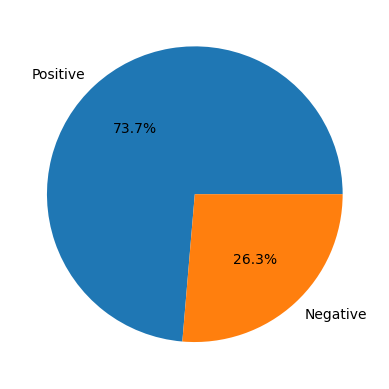

In [5]:
plt.pie(df['Rating'].value_counts(),labels=df['Rating'].unique().tolist(),autopct='%1.1f%%')
plt.show()

In [6]:
lenght=len(df['Review'][0])
print(f'Length of a sample review: {lenght}')


Length of a sample review: 593


In [7]:
df['Length']=df['Review'].str.len()
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,Positive,593
1,ok nothing special charge diamond member hilto...,Negative,1689
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427
3,"unique, great stay, wonderful time hotel monac...",Positive,600
4,"great stay great stay, went seahawk game aweso...",Positive,1281


In [8]:
word_count=df['Review'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

Word count in a sample review: 87


In [9]:
def word_count(review):
    review_list=review.split()
    return len(review_list)

In [10]:
df['Word_count']=df['Review'].apply(word_count)
df.head()

,Review,Rating,Length,Word_count
0,nice hotel expensive parking got good deal sta...,Positive,593,87
1,ok nothing special charge diamond member hilto...,Negative,1689,250
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191


In [11]:
df['mean_word_length']=df['Review'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
df.head()

,Review,Rating,Length,Word_count,mean_word_length
0,nice hotel expensive parking got good deal sta...,Positive,593,87,5.804598
1,ok nothing special charge diamond member hilto...,Negative,1689,250,5.752000
2,nice rooms not 4* experience hotel monaco seat...,Negative,1427,217,5.571429
3,"unique, great stay, wonderful time hotel monac...",Positive,600,89,5.730337
4,"great stay great stay, went seahawk game aweso...",Positive,1281,191,5.701571


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Review            20491 non-null  object 
 1   Rating            20491 non-null  object 
 2   Length            20491 non-null  int64  
 3   Word_count        20491 non-null  int64  
 4   mean_word_length  20491 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 800.6+ KB


In [2]:
import re
from nltk.corpus import stopwords
def clean(review):
    review= review.lower()
    review=re.sub('[^a-z A-Z 0-9-]+','',review)
    review=" ".join([word for word in review.split() if word not in stopwords.words('english')])
    return review

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df['Review']=df['Review'].apply(clean)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms 4 experience hotel monaco seattle g...,3
3,unique great stay wonderful time hotel monaco ...,5
4,great stay great stay went seahawk game awesom...,5


In [5]:
df['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non-existent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay 40 parking night'

In [8]:
def corpus(text):
    text_list=text.split()
    return text_list

In [9]:
df['Review_lists']=df['Review'].apply(corpus)
df.head()

,Review,Rating,Review_lists
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d..."
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member..."
2,nice rooms 4 experience hotel monaco seattle g...,3,"[nice, rooms, 4, experience, hotel, monaco, se..."
3,unique great stay wonderful time hotel monaco ...,5,"[unique, great, stay, wonderful, time, hotel, ..."
4,great stay great stay went seahawk game awesom...,5,"[great, stay, great, stay, went, seahawk, game..."


In [10]:
from tqdm import trange
corpus=[]
for i in trange(df.shape[0], ncols=150, nrows=10,colour='green', smoothing=0.8):
    corpus+=df['Review_lists'][i]
len(corpus)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 76686.73it/s]


41810

In [11]:
from collections import Counter
mostCommon=Counter(corpus).most_common(10)
mostCommon

[('hotel', 1119),
 ('room', 928),
 ('great', 467),
 ('stay', 442),
 ('nt', 409),
 ('seattle', 377),
 ('staff', 349),
 ('location', 306),
 ('rooms', 303),
 ('nice', 301)]

In [12]:
words=[]
freq=[]
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

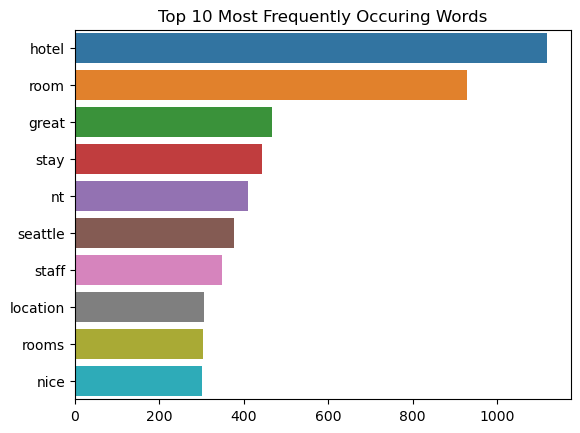

In [13]:
import seaborn as sns
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['Review'])

NameError: name 'df' is not defined

In [2]:
count_values=bigrams.toarray().sum(axis=0)
ngram_freq=pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()],reverse=True))
ngram_freq.columns=["frequnecy","ngram"]


NameError: name 'bigrams' is not defined

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correctly pass the columns to sns.barplot
sns.barplot(x='frequency', y='ngram', data=ngram_freq.head(10))
plt.title("Top 10 Most Frequently Occurring Bigrams")
plt.show()


NameError: name 'ngram_freq' is not defined